In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.integrate import quad
import scipy.special as sc
from scipy.integrate import odeint
import utility as psu
import scipy.integrate as integ
from scipy.optimize import curve_fit
from scipy import stats
import time
from matplotlib.colors import LogNorm
from numpy.random import randn
import matplotlib.colors as colors
import matplotlib.cbook as cbook
from matplotlib import cm
import os
import process_abalone_utility as pau

/data/abalone/ABALONE_RampingUp/2021_08_25_T1226_ABALONE_8kV_SiPM2_32V_LED300V.dat Number of events 594792.0
Total events number: 594792
event n. 0 time to process: 0.02
event n. 100000 time to process: 10.94
event n. 200000 time to process: 21.81
event n. 300000 time to process: 32.56
event n. 400000 time to process: 43.23
event n. 500000 time to process: 53.91


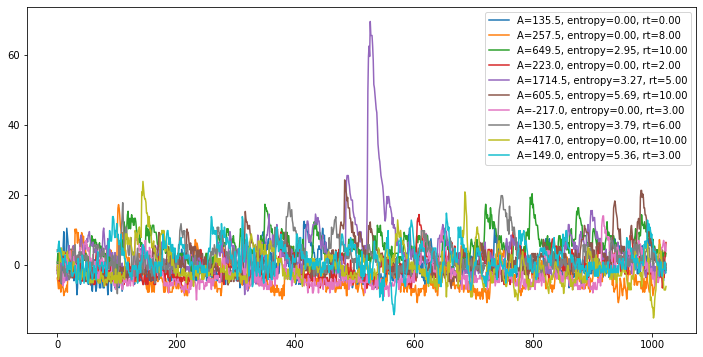

In [2]:
file_LED = '/data/abalone/ABALONE_RampingUp/2021_08_25_T1226_ABALONE_8kV_SiPM2_32V_LED300V.dat'
avolt = 8
dataLED = pau.process_abalone_data(filename=file_LED,nn=0,nplot=10,volts=avolt,sipmv=32,ledv='3')

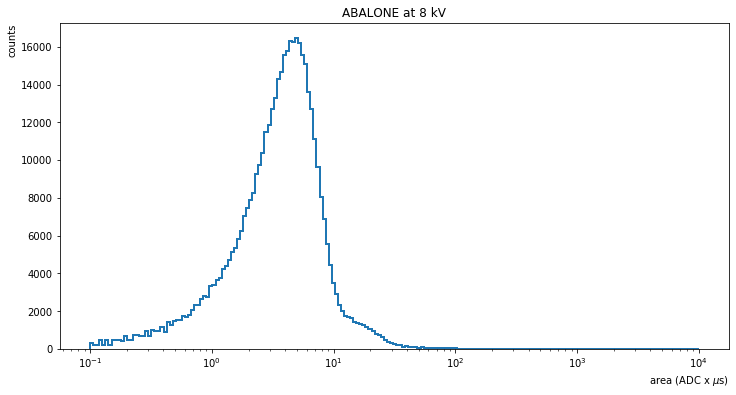

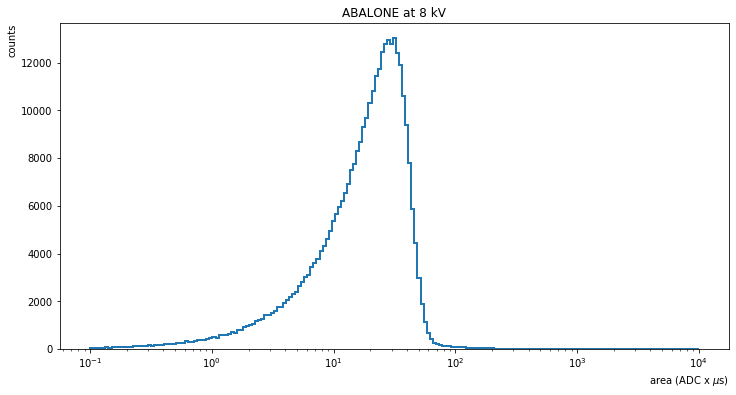

<Figure size 864x432 with 0 Axes>

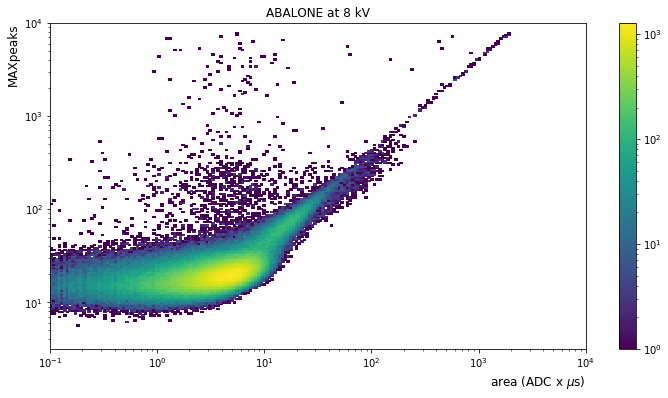

<Figure size 864x432 with 0 Axes>

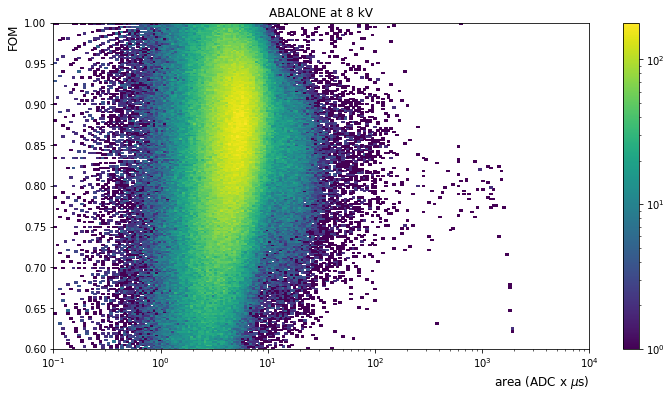

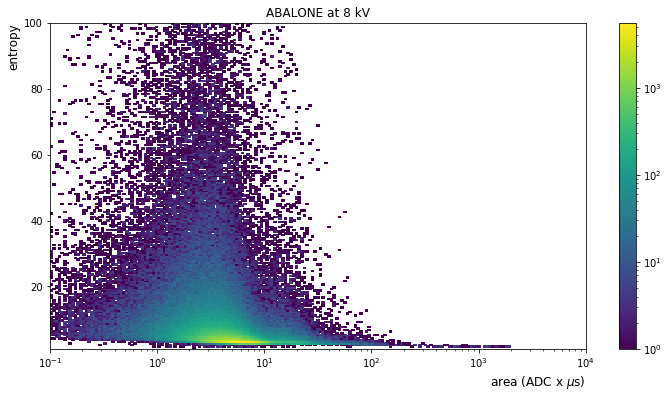

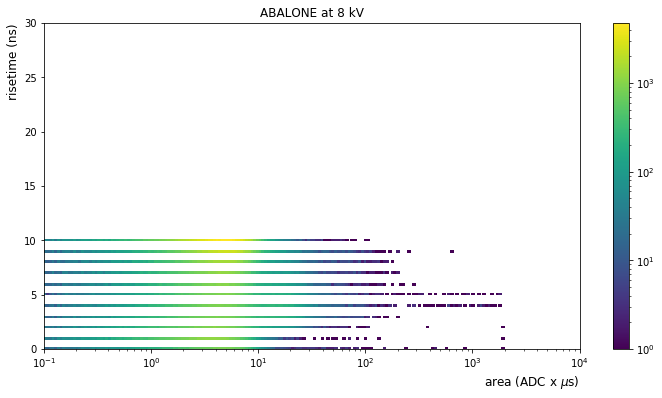

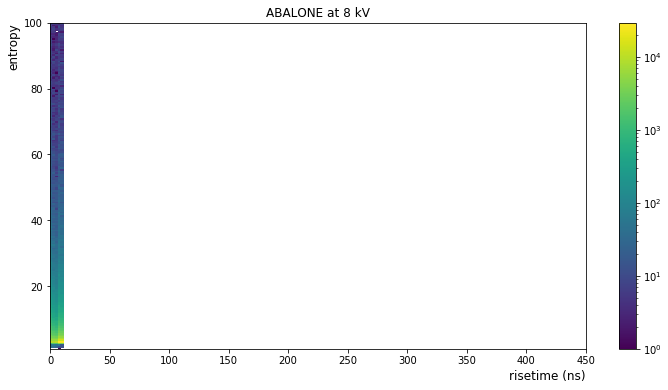

In [3]:
pau.plot_data(data=dataLED,fvolt=avolt,low=-1, high=4,low_max=0.5,high_max=4,low_en=1, high_en=100,
              low_fom=0.6,high_fom=1,high_rt=30)

/data/abalone/ABALONE_RampingUp/2021_08_25_T1226_ABALONE_8kV_SiPM2_32V_LED300V.dat Number of events 594792.0
n. events 0 waveform samples 1024
Events rejected by areaup 0 -> 0.0 %

n. events 113839 waveform samples 1024
Events rejected by areadown 113839 -> 19.139295753809733 %

n. events 0 waveform samples 1024
Events rejected by entropy 0 -> 0.0 %

n. events 0 waveform samples 1024
Events rejected by max 0 -> 0.0 %

n. events 126 waveform samples 1024
Events rejected by risetime 126 -> 0.021183876044062463 %

n. events 533580 waveform samples 1024
Events rejected by max position 533580 -> 89.70867126659402 %

n. events 39938 waveform samples 1024


/usr/share/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:2377: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->floating,key->block2_values] [items->['area_filt', 'width']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)


Events selected  39938 -> 6.714616201966401 %


<Figure size 864x432 with 0 Axes>

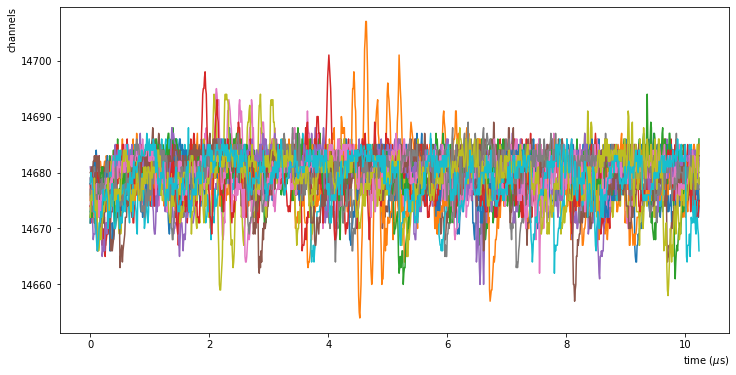

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

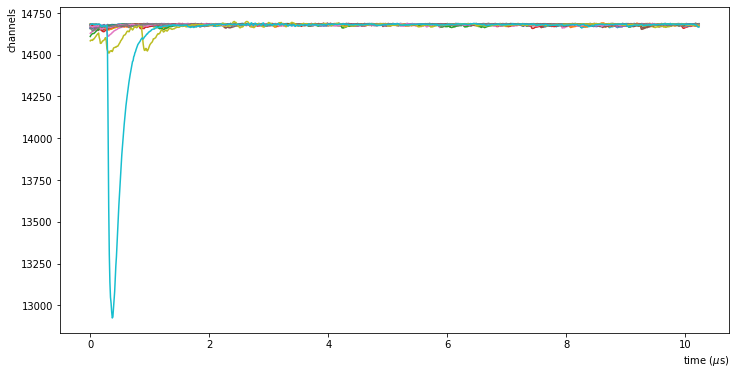

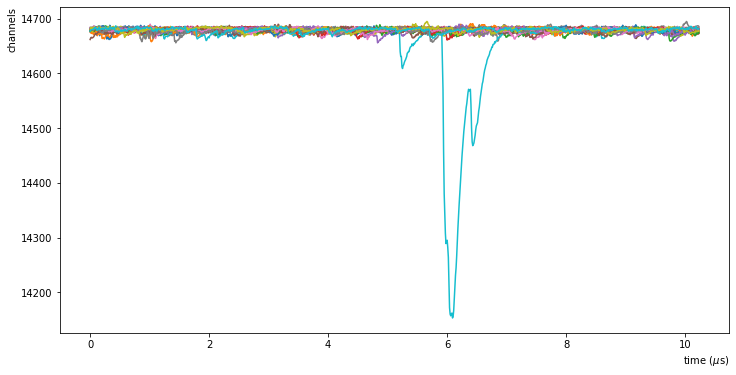

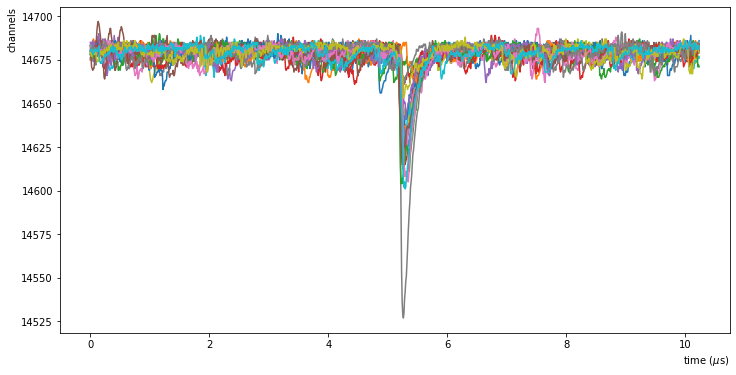

In [4]:
new_data, new_wf = pau.select_data(dataLED,filename=file_LED,entr_cut=200,max_cut=1,area_cut=(0,1e7),
                                   pos_cut=(500,550),rt_cut=0,events=20, save=1,volts=avolt,sipmv=32,ledv='3')

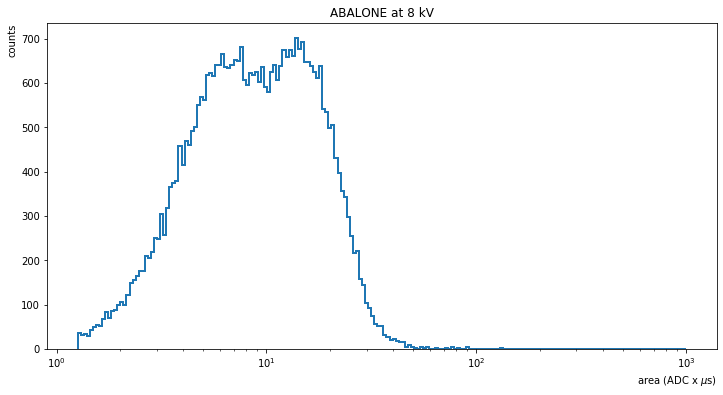

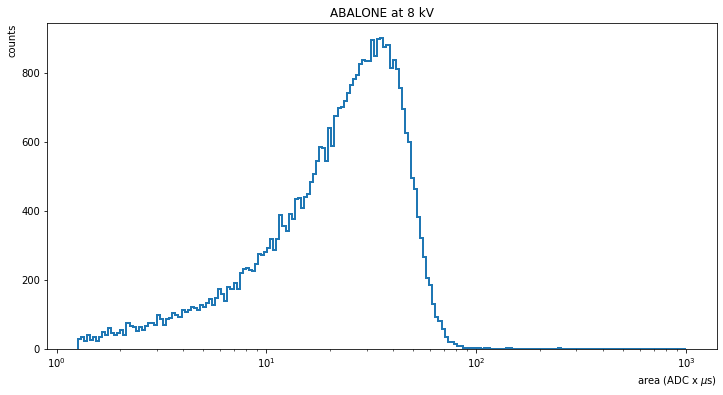

<Figure size 864x432 with 0 Axes>

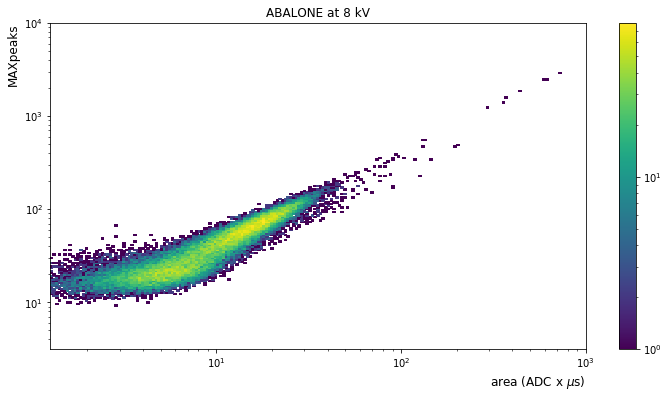

<Figure size 864x432 with 0 Axes>

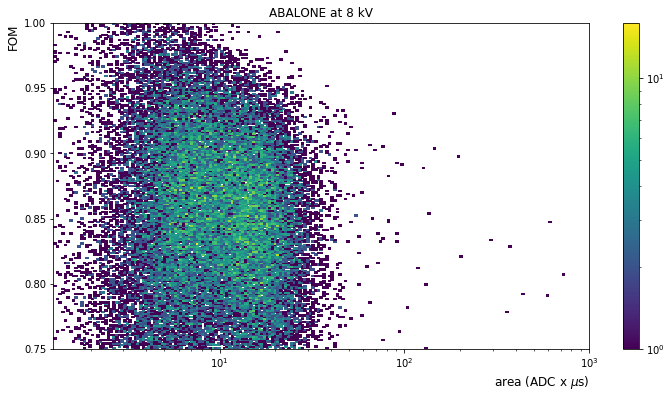

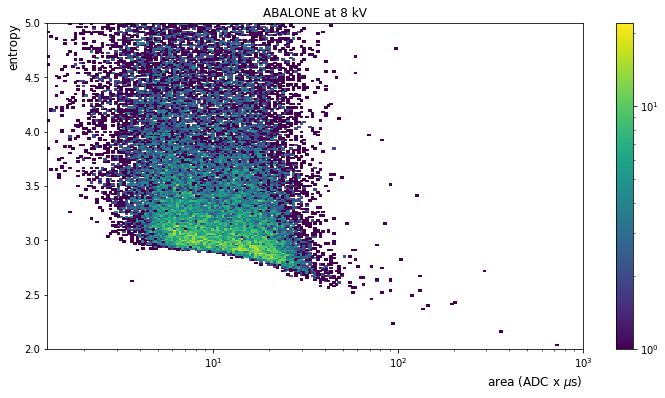

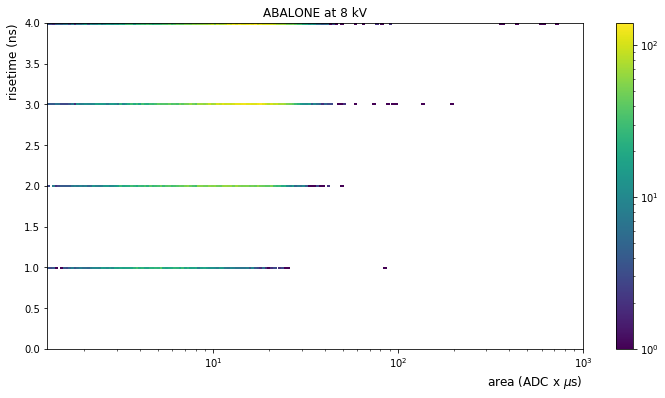

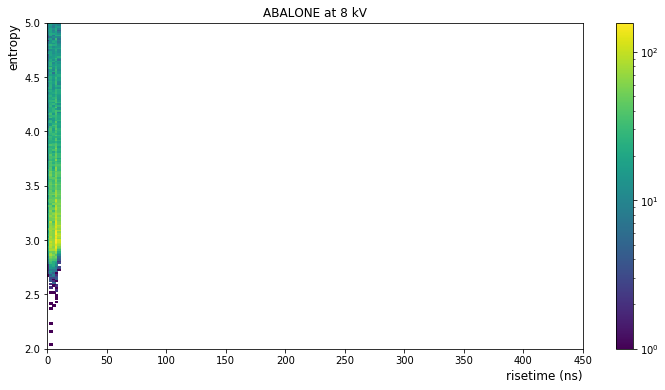

In [5]:
pau.plot_data(data=new_data,fvolt=avolt,low=0.1, high=3,low_max=0.5,high_max=4,low_en=2, high_en=5,
          low_fom=0.75,high_fom=1)

n. events 13068 waveform samples 1024


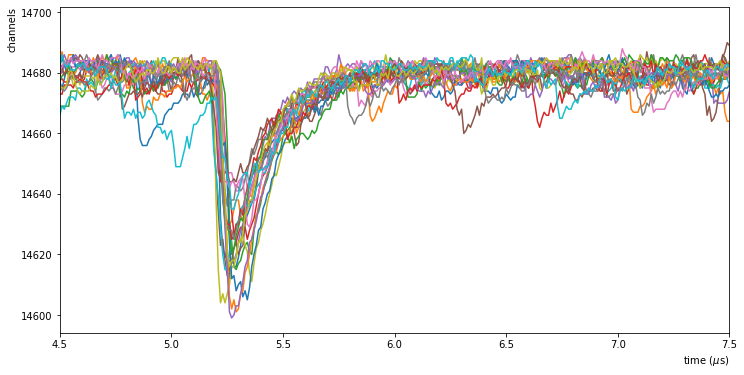

In [6]:
wf2 = new_wf[(new_data['area']>10)&(new_data['area']<20)]
psu.plot_waveforms( wf2,events=20,tlim=(4.5,7.5))

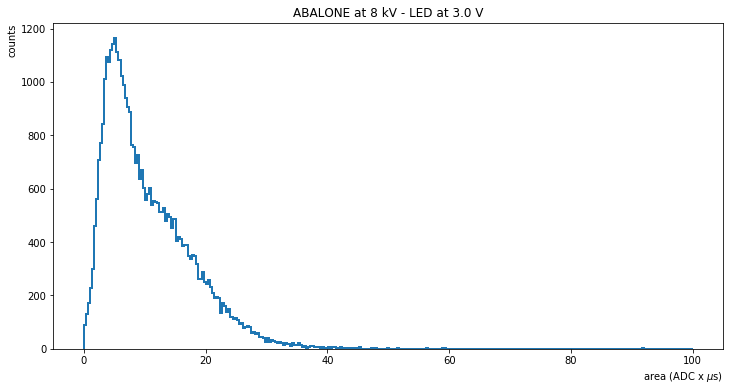

In [7]:
pau.plot_pe_spectrum(new_data['area'], volts=avolt, low=0, high=100, bins=300, ledv=3)

In [ ]:
peakint = pau.calculate_integrals( new_wf, nn=0, volts=avolt, sipmv = 32, ledv = '4', plot = 0, save = 1 )

In [ ]:
pau.plot_pe_spectrum(peakint, volts=avolt, low=0, high=100, bins=300, ledv=4)

/data/abalone/ABALONE_RampingUp/2021_08_25_T1237_ABALONE_8kV_SiPM2_32V_LED400V.dat Number of events 594803.0
Total events number: 594803
event n. 0 time to process: 0.00
event n. 100000 time to process: 12.61
event n. 200000 time to process: 25.25
event n. 300000 time to process: 37.84
event n. 400000 time to process: 50.46
event n. 500000 time to process: 63.01


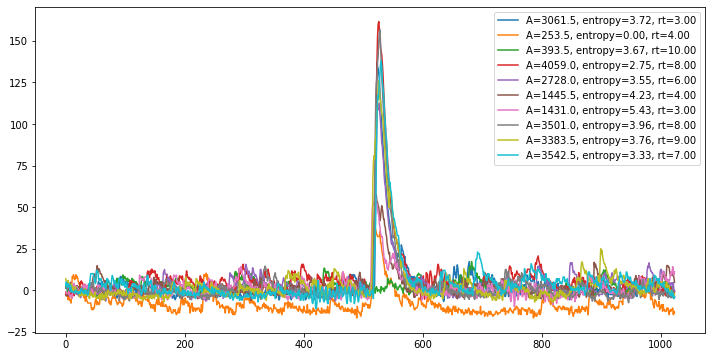

In [8]:
file_LED = '/data/abalone/ABALONE_RampingUp/2021_08_25_T1237_ABALONE_8kV_SiPM2_32V_LED400V.dat'
dataLED = pau.process_abalone_data(filename=file_LED,nn=0,nplot=10,volts=avolt,sipmv=32,ledv='4')

/data/abalone/ABALONE_RampingUp/2021_08_25_T1237_ABALONE_8kV_SiPM2_32V_LED400V.dat Number of events 594803.0
n. events 0 waveform samples 1024
Events rejected by areaup 0 -> 0.0 %

n. events 20586 waveform samples 1024
Events rejected by areadown 20586 -> 3.460977836359265 %

n. events 0 waveform samples 1024
Events rejected by entropy 0 -> 0.0 %

n. events 0 waveform samples 1024
Events rejected by max 0 -> 0.0 %

n. events 16 waveform samples 1024
Events rejected by risetime 16 -> 0.0026899662577357544 %

n. events 126278 waveform samples 1024
Events rejected by max position 126278 -> 21.230222443397224 %

n. events 379842 waveform samples 1024
Events selected  379842 -> 63.86013520442903 %


<Figure size 864x432 with 0 Axes>

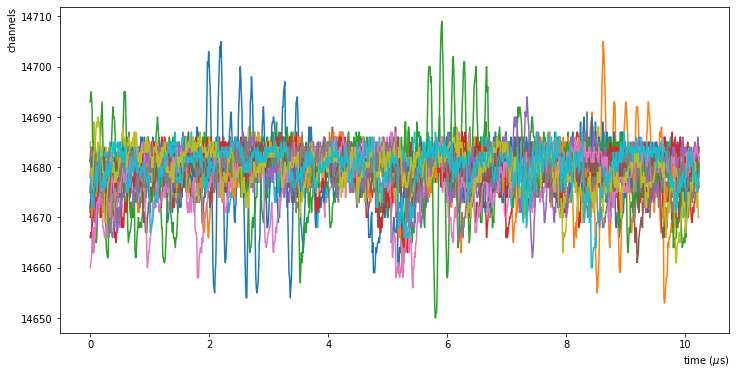

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

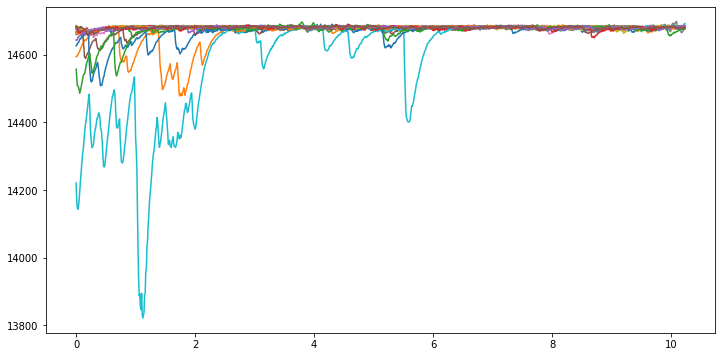

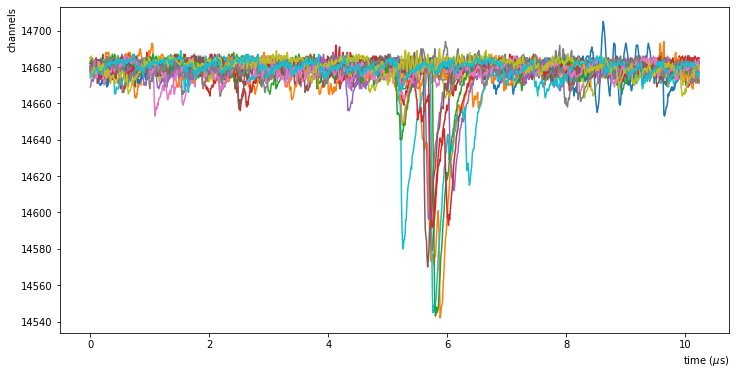

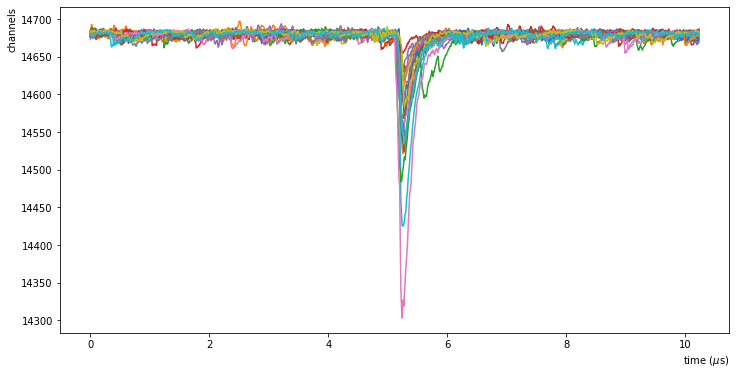

In [9]:
new_data, new_wf = pau.select_data(dataLED,filename=file_LED,entr_cut=200,max_cut=1,area_cut=(0,1e7),
                                   pos_cut=(500,550),rt_cut=0,events=20, save=1,volts=avolt,sipmv=32,ledv='4')

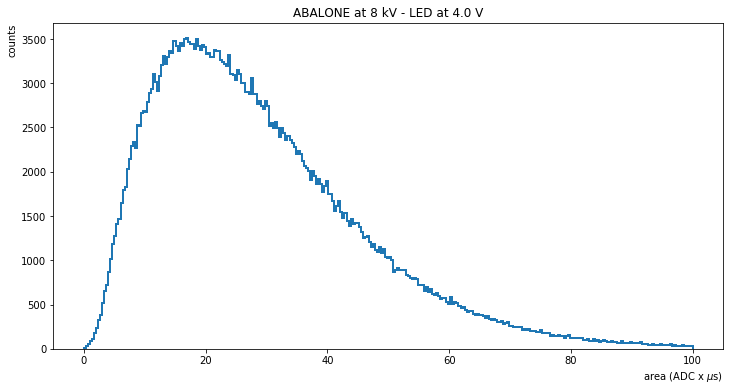

In [10]:
pau.plot_pe_spectrum(new_data['area'], volts=avolt, low=0, high=100, bins=300, ledv=4)